In [ ]:
import numpy as np
import re
import pandas as pd

all_df = pd.read_csv('london_All7year.csv', delimiter=',')

#seprate_date
all_df[['day','hour']] = all_df['date'].str.split(' ', 1, expand=True)
all_df[['month','hour']] = all_df['hour'].str.split(' ', 1, expand=True)
all_df[['day_date','hour']] = all_df['hour'].str.split(' ', 1, expand=True)
all_df.head(3)
all_df[['year','hour']] = all_df['hour'].str.split(' ', 1, expand=True)
all_df[['start_hour','end_hour']] = all_df['hour'].str.split('—', 1, expand=True)
all_df['day'] = all_df['day'].replace(',', '',regex=True)
all_df['day_date'] = all_df['day_date'].replace(',', '',regex=True)
all_df['year'] = all_df['year'].replace(',', '',regex=True)

all_df = all_df.drop(columns=['hour'])
#all_df.to_csv('clean_Weather_london_1.csv', sep=',')
all_df = all_df[['date', 'date_id','wind','desc','temp','baro','hum','year','month','day','day_date','start_hour','end_hour']]
all_df[['wind', 'temp','baro']] = all_df[['wind', 'temp','baro']].astype(float)
all_df[['hum', 'year','day_date']] = all_df[['hum', 'year','day_date']].astype(int)

In [ ]:
from datetime import datetime

#convert 12 hour to 24 hour 
all_df['start_hour'] = pd.to_datetime(all_df['start_hour']).dt.strftime('%H:%M')

#end hour is ' 6:00 am' so it has extra space
#remove space
all_df['end_hour']=all_df['end_hour'].str.replace(' ', '')
all_df['end_hour'] = pd.to_datetime(all_df['end_hour']).dt.strftime('%H:%M')

# convert month name to number
all_df['month'] = pd.to_datetime(all_df.month, format='%B').dt.month
all_df.head(3)

,date,date_id,wind,desc,temp,baro,hum,year,month,day,day_date,start_hour,end_hour
0,"Friday, January 1, 2021, 12:00 am — 6:00 am",1.609459e+12,4.971,Low clouds.,32.0,29.82,99,2021,1,Friday,1,00:00,06:00
1,"Friday, January 1, 2021, 6:00 am — 12:00 pm",1.609481e+12,4.971,Low clouds.,33.8,29.86,94,2021,1,Friday,1,06:00,12:00
2,"Friday, January 1, 2021, 12:00 pm — 6:00 pm",1.609502e+12,4.350,Drizzle. Low clouds.,37.4,29.87,96,2021,1,Friday,1,12:00,18:00


In [ ]:
days = {'Monday':0, 'Tuesday':1,'Wednesday': 2, 'Thursday':3, 'Friday':4,'Saturday': 5, 'Sunday':6}
all_df['day'] = all_df['day'].map(days)
all_df.head(2)

,date,date_id,wind,desc,temp,baro,hum,year,month,day,day_date,start_hour,end_hour
0,"Friday, January 1, 2021, 12:00 am — 6:00 am",1.609459e+12,4.971,Low clouds.,32.0,29.82,99,2021,1,4,1,00:00,06:00
1,"Friday, January 1, 2021, 6:00 am — 12:00 pm",1.609481e+12,4.971,Low clouds.,33.8,29.86,94,2021,1,4,1,06:00,12:00


In [ ]:
all_df.head(15)
all_df.to_csv("cleanAll7Year.csv", index=False) 

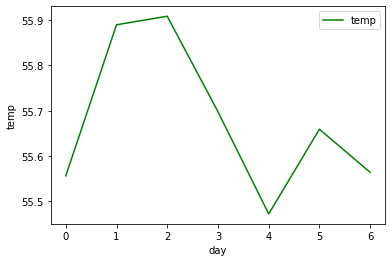

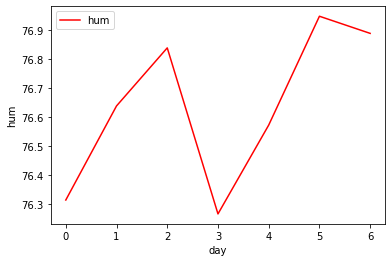

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# in all 7 years_ mean temp of each weekday 
df= all_df.groupby(['day'])['temp'].mean().reset_index()
df2= all_df.groupby(['day'])['hum'].mean().reset_index()

ax=df.plot(x ='day', y='temp', kind = 'line' , color=['green'])
ax2=df2.plot(x ='day', y='hum', kind = 'line' , color=['red'])
ax.set_ylabel("temp")
ax.set_xlabel("day")

ax2.set_ylabel("hum")
ax2.set_xlabel("day")
#plt.yticks(np.arange(53, 80, 1))
#plt.savefig('meanTemp_weekday.pdf')
plt.show()

In [ ]:
new_df=all_df[['date_id','wind','temp','baro','hum','year']]
new_df

,date_id,wind,temp,baro,hum,year
0,1.609459e+12,4.971,32.0,29.82,99,2021
1,1.609481e+12,4.971,33.8,29.86,94,2021
2,1.609502e+12,4.350,37.4,29.87,96,2021
3,1.609524e+12,4.971,39.2,29.93,96,2021
4,1.609546e+12,7.457,39.2,29.97,92,2021
...,...,...,...,...,...,...
10217,1.483121e+12,2.486,37.4,30.56,99,2016
10218,1.483142e+12,1.864,39.2,30.51,98,2016
10219,1.483164e+12,3.728,44.6,30.48,99,2016
10220,1.483186e+12,6.214,46.4,30.38,92,2016


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0c7240350>,
      dtype=object)

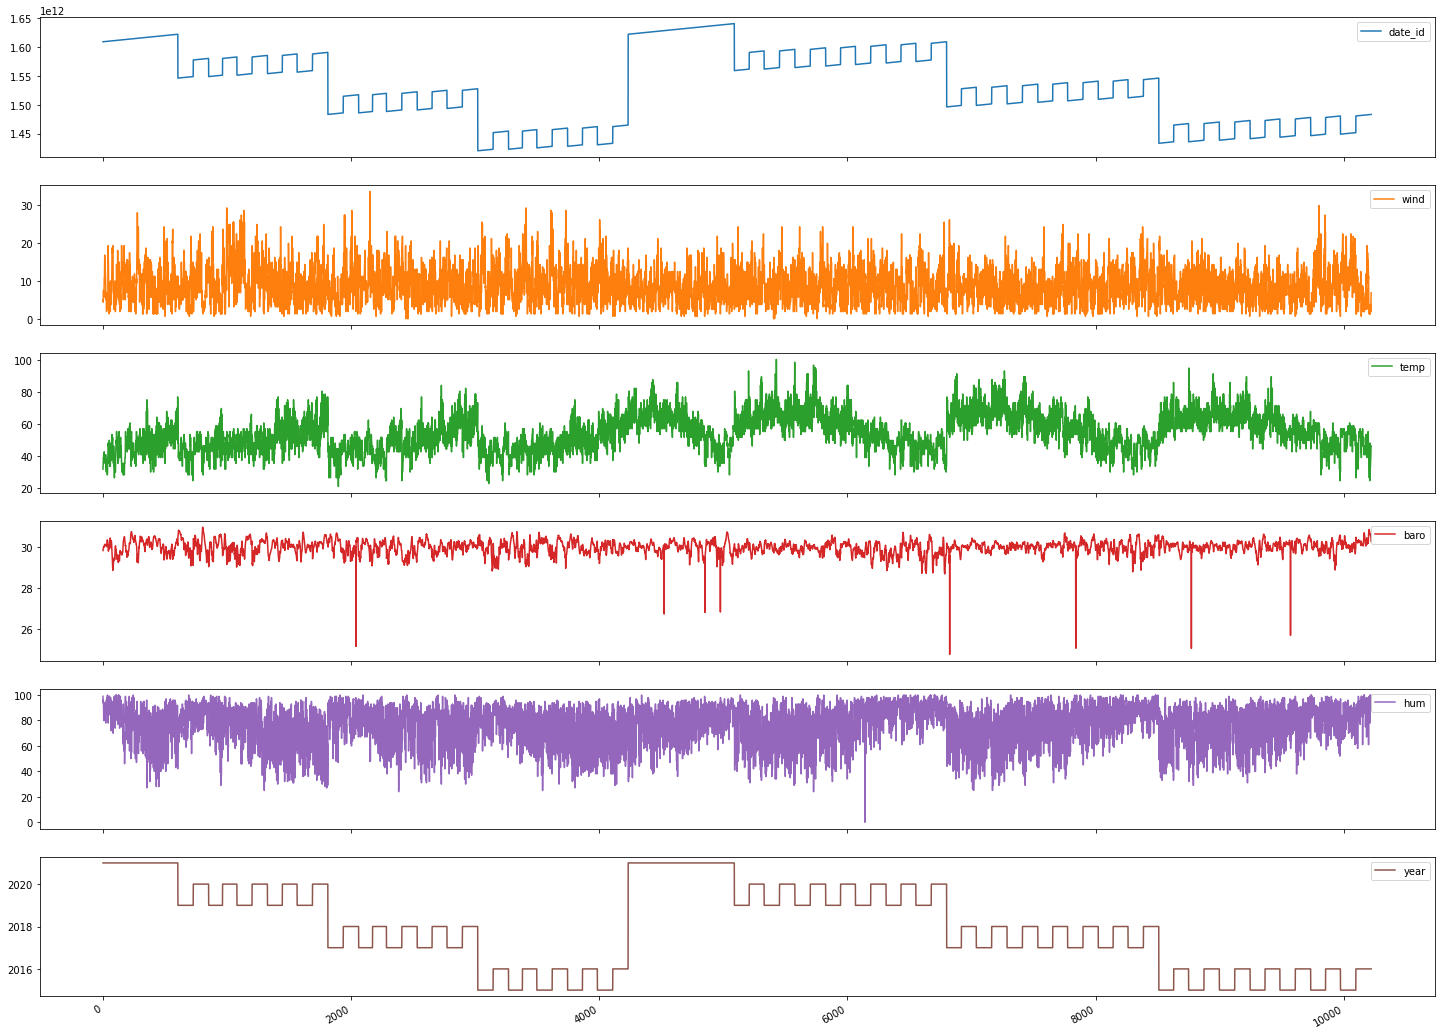

In [ ]:
# in all 7 years
new_df.plot(subplots=True, figsize=(25,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0c6cf0950>,
      dtype=object)

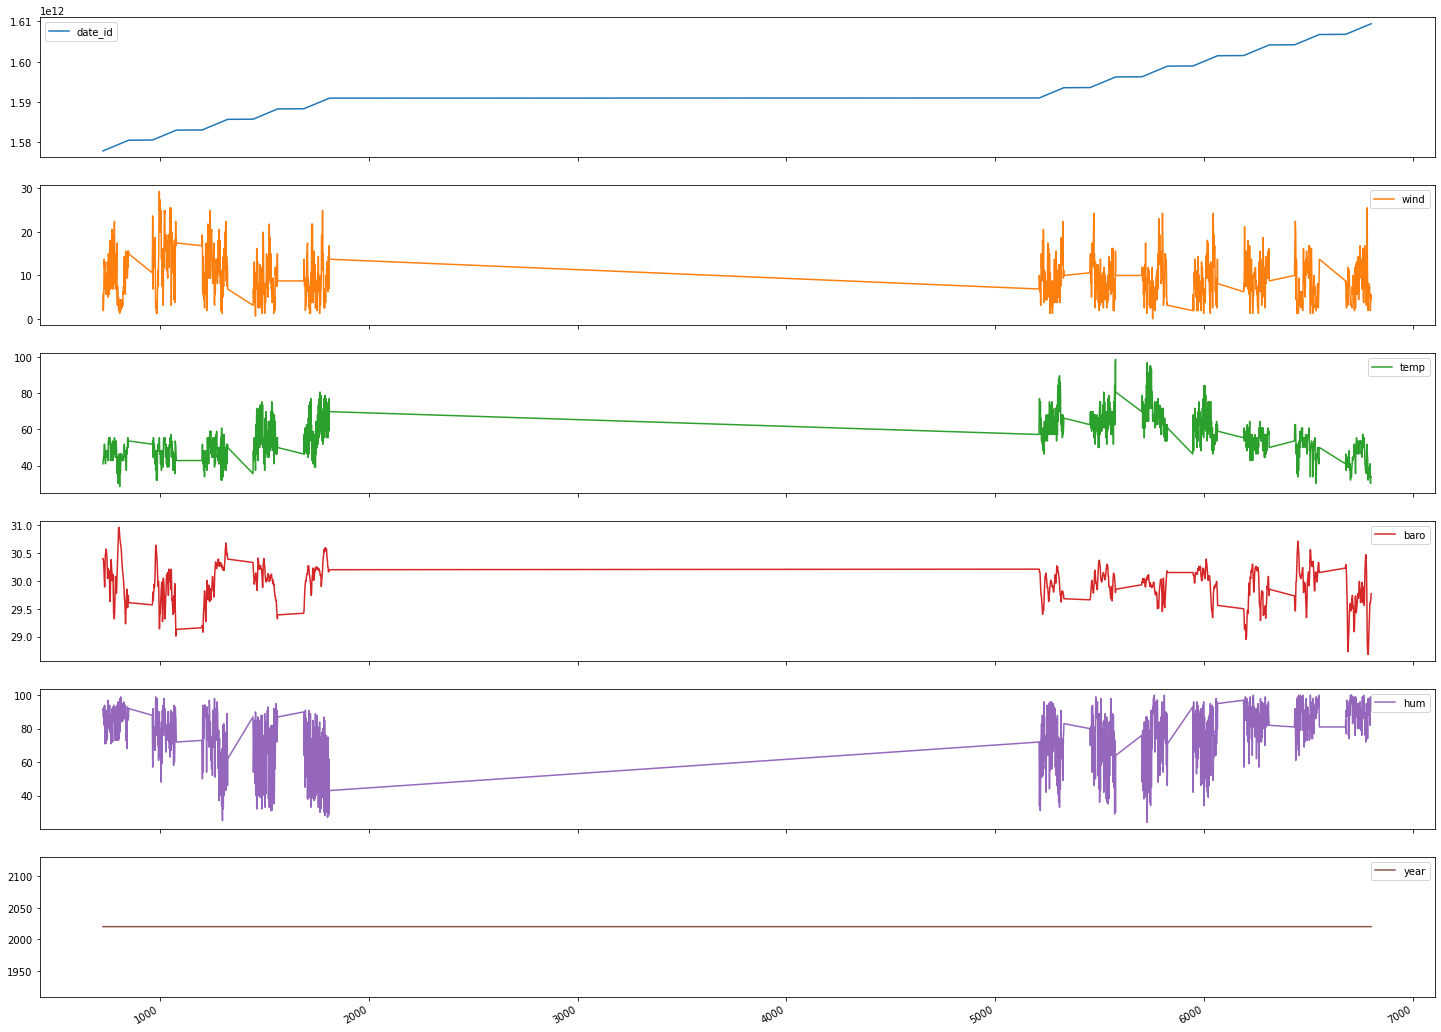

In [ ]:
# one year => 2020 example
df2 = new_df[new_df['year'].astype('str').str.contains('2020')]
df2.plot(subplots=True, figsize=(25,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0c6a9f990>,
      dtype=object)

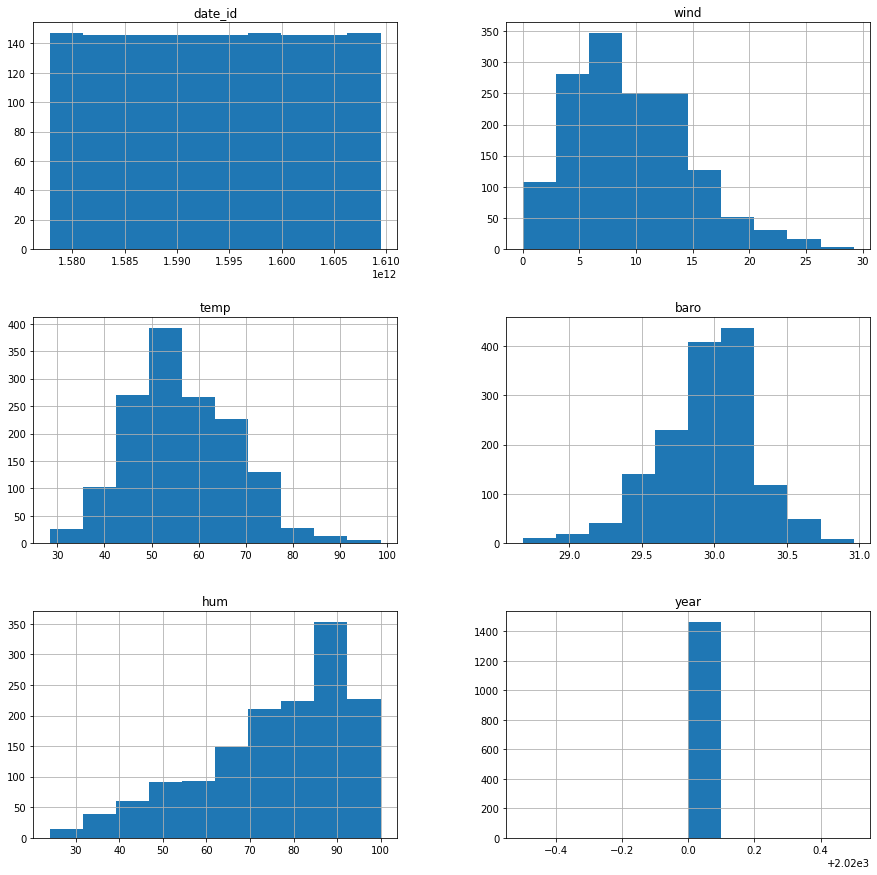

In [ ]:
df2.hist(bins=10,figsize=(15,15))